In [ ]:
!kaggle datasets download -d francismon/curated-colon-dataset-for-deep-learning

Dataset URL: https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning
License(s): unknown
100% 1.40G/1.41G [00:21<00:00, 106MB/s] 
100% 1.41G/1.41G [00:21<00:00, 69.9MB/s]


In [ ]:
!unzip "/content/curated-colon-dataset-for-deep-learning.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/0_normal/train_normal_ (28).jpg  
  inflating: train/0_normal/train_normal_ (280).jpg  
  inflating: train/0_normal/train_normal_ (281).jpg  
  inflating: train/0_normal/train_normal_ (282).jpg  
  inflating: train/0_normal/train_normal_ (283).jpg  
  inflating: train/0_normal/train_normal_ (284).jpg  
  inflating: train/0_normal/train_normal_ (285).jpg  
  inflating: train/0_normal/train_normal_ (286).jpg  
  inflating: train/0_normal/train_normal_ (287).jpg  
  inflating: train/0_normal/train_normal_ (288).jpg  
  inflating: train/0_normal/train_normal_ (289).jpg  
  inflating: train/0_normal/train_normal_ (29).jpg  
  inflating: train/0_normal/train_normal_ (290).jpg  
  inflating: train/0_normal/train_normal_ (291).jpg  
  inflating: train/0_normal/train_normal_ (292).jpg  
  inflating: train/0_normal/train_normal_ (293).jpg  
  inflating: train/0_normal/train_normal_ (294).jpg  
  inflating: train/0_normal/train

In [ ]:
train_path = "/content/train"
test_path = "/content/test"
valid_path = "/content/val"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, shear_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:
train = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 20)
test = test_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 20)
valid = valid_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 20)


Found 3200 images belonging to 4 classes.
Found 3200 images belonging to 4 classes.
Found 3200 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(include_top = False , input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
output = Dense(4,activation = "softmax")(x)

In [ ]:
vgg16 = Model(vgg.input , output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
history = vgg16.fit(train , validation_data= test,epochs = 5)

Epoch 1/5
160/160 [==============================] - 107s 622ms/step - loss: 0.2567 - accuracy: 0.9134 - val_loss: 0.1309 - val_accuracy: 0.9469
Epoch 2/5
160/160 [==============================] - 100s 624ms/step - loss: 0.0870 - accuracy: 0.9688 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 3/5
160/160 [==============================] - 100s 628ms/step - loss: 0.0551 - accuracy: 0.9806 - val_loss: 0.1200 - val_accuracy: 0.9481
Epoch 4/5
160/160 [==============================] - 82s 514ms/step - loss: 0.0398 - accuracy: 0.9847 - val_loss: 0.1132 - val_accuracy: 0.9522
Epoch 5/5
160/160 [==============================] - 81s 509ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0190 - val_accuracy: 0.9937


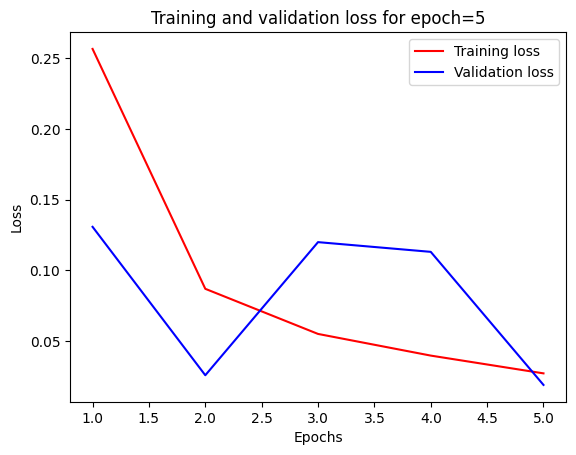

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'r', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
history2 = vgg16.fit(train , validation_data= test,epochs = 20)

training_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']



Epoch 1/20
160/160 [==============================] - 84s 523ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 8.8948e-04 - val_accuracy: 0.9997
Epoch 2/20
160/160 [==============================] - 83s 520ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 3/20
160/160 [==============================] - 83s 517ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 2.5036e-04 - val_accuracy: 1.0000
Epoch 4/20
160/160 [==============================] - 83s 519ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.0220 - val_accuracy: 0.9922
Epoch 5/20
160/160 [==============================] - 98s 615ms/step - loss: 0.0154 - accuracy: 0.9937 - val_loss: 1.4818e-04 - val_accuracy: 1.0000
Epoch 6/20
160/160 [==============================] - 82s 513ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0486 - val_accuracy: 0.9866
Epoch 7/20
160/160 [==============================] - 82s 511ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0

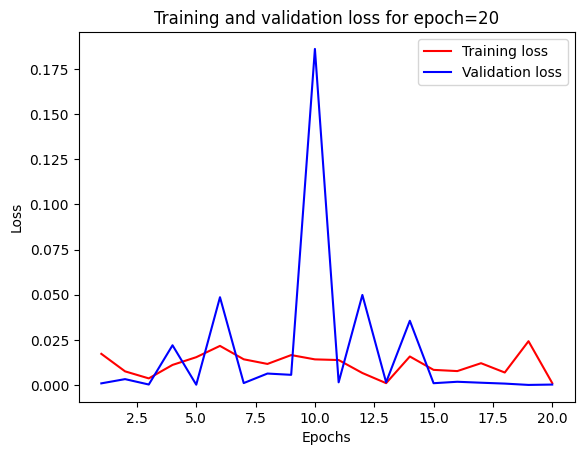

In [ ]:
epochs2 = range(1, len(training_loss2) + 1)

plt.plot(epochs2, training_loss2, 'r', label='Training loss')
plt.plot(epochs2, validation_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [ ]:
index=['normal','ulcerative_colitis','polyps','esophagitis']

In [ ]:
# Img_path= '/content/Ulcerative_colitis_cdp-20140508023745135.png'
# img=load_img(Img_path,target_size=(224,224))
# x=img_to_array(img)
# x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape
# output=np.argmax(vgg16.predict(img_data), axis=1)
# result = index[output[0]]
# result

In [ ]:
def predict_classification(Img_path):
  img=load_img(Img_path,target_size=(224,224))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  img_data.shape
  output=np.argmax(vgg16.predict(img_data), axis=1)
  result = index[output[0]]
  return result


In [ ]:
print(predict_classification('/content/val/3_esophagitis/val_esophagitis_ (210).jpg'))

1/1 [==============================] - 0s 25ms/step
esophagitis


# **RESNET MODEL**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
resnet50 = ResNet50(include_top = False , input_shape = (224,224,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet50.layers:
  print(layer)

In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
x1 = Flatten()(resnet50.output)

In [ ]:
output = Dense(4,activation = "softmax")(x1)

In [ ]:
resnet = Model(resnet50.input , output)

In [ ]:
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
resnet.compile(loss = "categorical_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [ ]:
history3 = resnet.fit(train , validation_data = test , epochs = 5)

Epoch 1/5
160/160 [==============================] - 81s 509ms/step - loss: 0.4264 - accuracy: 0.8394 - val_loss: 0.3856 - val_accuracy: 0.8422
Epoch 2/5
160/160 [==============================] - 81s 504ms/step - loss: 0.5056 - accuracy: 0.8156 - val_loss: 0.3810 - val_accuracy: 0.8481
Epoch 3/5
160/160 [==============================] - 80s 500ms/step - loss: 0.5100 - accuracy: 0.8231 - val_loss: 0.3660 - val_accuracy: 0.8537
Epoch 4/5
160/160 [==============================] - 81s 506ms/step - loss: 0.3765 - accuracy: 0.8594 - val_loss: 0.2215 - val_accuracy: 0.9191
Epoch 5/5
160/160 [==============================] - 80s 500ms/step - loss: 0.3833 - accuracy: 0.8625 - val_loss: 0.2326 - val_accuracy: 0.9047


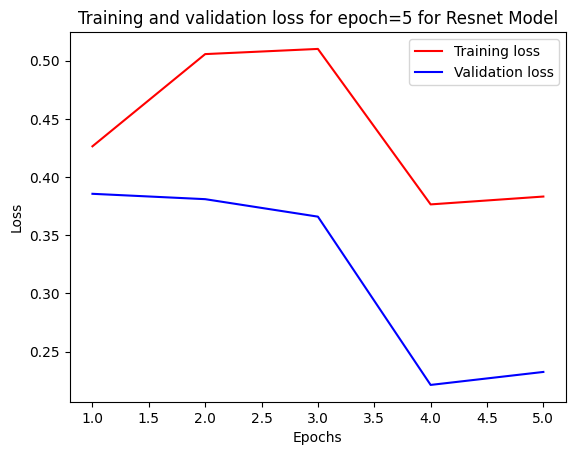

In [ ]:
training_loss3 = history3.history['loss']
validation_loss3 = history3.history['val_loss']

epochs3 = range(1, len(training_loss3) + 1)

plt.plot(epochs3, training_loss3, 'r', label='Training loss')
plt.plot(epochs3, validation_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5 for Resnet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Inception**

In [ ]:
train = train_datagen.flow_from_directory(train_path , target_size = (299,299), batch_size = 20)
test = test_datagen.flow_from_directory(test_path , target_size = (299,299), batch_size = 20)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
inception_v3 = InceptionV3(include_top=False , input_shape = (299,299,3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception_v3.layers:
  print(layer)

In [ ]:
for layer in inception_v3.layers:
  layer.trainable = False

In [ ]:
x3 = Flatten()(inception_v3.output)

In [ ]:
output3 = Dense(4,activation = "softmax")(x3)

In [ ]:
inception = Model(inception_v3.input, output3)

In [ ]:
inception.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

In [ ]:
inception.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history4 = inception.fit(train, validation_data = test,epochs = 5)

Epoch 1/5
160/160 [==============================] - 106s 614ms/step - loss: 2.6529 - accuracy: 0.8931 - val_loss: 0.8691 - val_accuracy: 0.9375
Epoch 2/5
160/160 [==============================] - 92s 577ms/step - loss: 0.5101 - accuracy: 0.9691 - val_loss: 0.6682 - val_accuracy: 0.9525
Epoch 3/5
160/160 [==============================] - 91s 564ms/step - loss: 0.3904 - accuracy: 0.9747 - val_loss: 1.3684 - val_accuracy: 0.9362
Epoch 4/5
160/160 [==============================] - 91s 566ms/step - loss: 0.4131 - accuracy: 0.9778 - val_loss: 0.6467 - val_accuracy: 0.9675
Epoch 5/5
160/160 [==============================] - 90s 561ms/step - loss: 0.2585 - accuracy: 0.9850 - val_loss: 4.9814 - val_accuracy: 0.8537


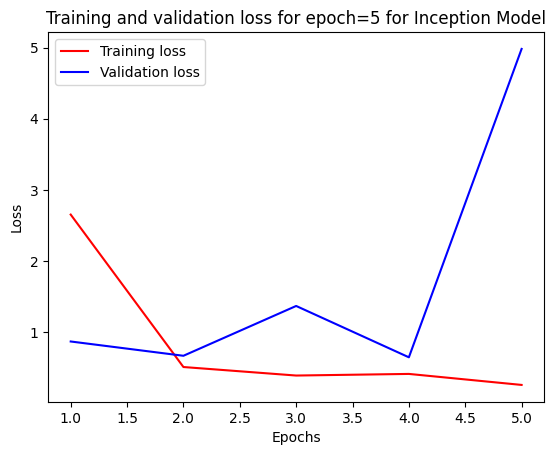

In [ ]:
training_loss4 = history4.history['loss']
validation_loss4 = history4.history['val_loss']

epochs4 = range(1, len(training_loss4) + 1)

plt.plot(epochs4, training_loss4, 'r', label='Training loss')
plt.plot(epochs4, validation_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5 for Inception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

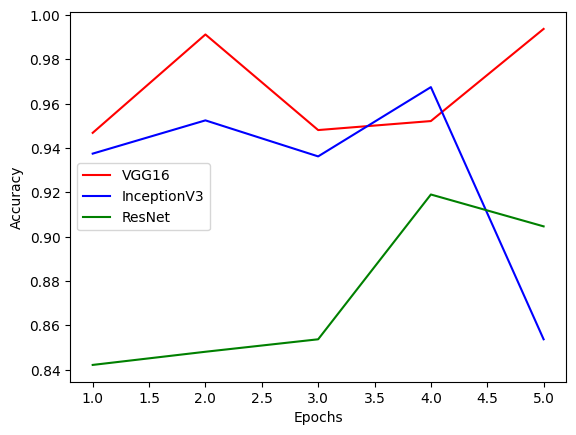

In [ ]:
accuracy_vgg = history.history["val_accuracy"]
accuracy_resnet = history3.history["val_accuracy"]
accuracy_inception = history4.history["val_accuracy"]
epochs5 = range(1,6)
plt.plot(epochs5,accuracy_vgg,'r',label = "VGG16")
plt.plot(epochs5,accuracy_inception,'b',label = "InceptionV3")
plt.plot(epochs5,accuracy_resnet,'g',label = "ResNet")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
vgg16.save("vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
